Importing Libraries

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

Load and Explore data

In [4]:
df=pd.read_csv(r"data\DatasetForCoffeeSales2.csv")


In [5]:
df.head()

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472


In [6]:
#Getting the shape of the dataframe 
df.shape

(730, 11)

In [7]:
#Display information about the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             730 non-null    object
 1   Customer_ID      730 non-null    int64 
 2   City             730 non-null    object
 3   Category         730 non-null    object
 4   Product          730 non-null    object
 5   Unit Price       730 non-null    int64 
 6   Quantity         730 non-null    int64 
 7   Sales Amount     730 non-null    int64 
 8   Used_Discount    730 non-null    bool  
 9   Discount_Amount  730 non-null    int64 
 10  Final Sales      730 non-null    int64 
dtypes: bool(1), int64(6), object(4)
memory usage: 57.9+ KB


In [8]:
df.describe()

,Customer_ID,Unit Price,Quantity,Sales Amount,Discount_Amount,Final Sales
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,51.669863,36.794521,26.080822,959.924658,97.393151,862.531507
std,29.014339,4.955104,14.480971,551.282730,123.401350,509.032315
min,1.000000,30.000000,1.000000,30.000000,0.000000,24.000000
25%,27.250000,35.000000,14.000000,495.000000,0.000000,448.000000
50%,52.000000,35.000000,27.000000,960.000000,13.000000,840.000000
75%,77.000000,40.000000,39.000000,1400.000000,192.000000,1260.000000
max,100.000000,45.000000,49.000000,2205.000000,441.000000,2205.000000


Clean Data

In [9]:
#Checking is there any rows which are duplicate if it is there then we will remove 
df.duplicated().sum()

np.int64(0)

In [10]:
#Convertind date columnn to datetime
df.head(1)

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560


In [11]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0     2023-01-01
1     2023-01-02
2     2023-01-03
3     2023-01-04
4     2023-01-05
         ...    
725   2024-12-26
726   2024-12-27
727   2024-12-28
728   2024-12-29
729   2024-12-30
Name: Date, Length: 730, dtype: datetime64[ns]

Sales Performance over time 

In [12]:
#Aggregate sales per year
df.head(1)

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,2023-01-01,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560


In [13]:
sales_yearly=df.groupby(df['Date'].dt.to_period("Y"))["Final Sales"].sum()
sales_yearly

Date
2023    313149
2024    316499
Freq: Y-DEC, Name: Final Sales, dtype: int64

C:\Users\Ashwani\AppData\Local\Temp\ipykernel_4260\887825530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_yearly.index,y=sales_yearly.values,palette="Blues_r")


Text(0, 0.5, 'yearly sales')

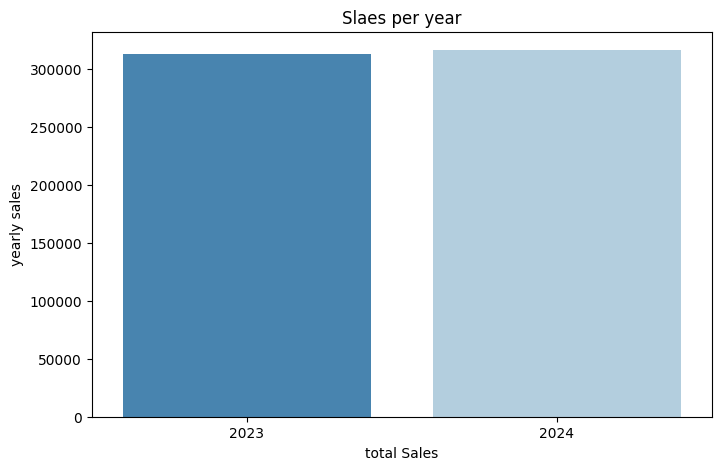

In [14]:
#Ploting sales per year
plt.figure(figsize=(8,5))
sns.barplot(x=sales_yearly.index,y=sales_yearly.values,palette="Blues_r")
plt.title("Slaes per year")
plt.xlabel("total Sales")
plt.ylabel("yearly sales")

In [15]:
#now its the time to find out the Slaes per month 
monthly_sales=df.groupby(df['Date'].dt.to_period('M'))['Final Sales'].sum()
monthly_sales

Date
2023-01    26056
2023-02    23757
2023-03    32211
2023-04    24284
2023-05    25901
2023-06    27964
2023-07    26673
2023-08    27663
2023-09    24667
2023-10    25640
2023-11    24767
2023-12    23566
2024-01    26018
2024-02    27694
2024-03    24308
2024-04    23598
2024-05    25674
2024-06    29244
2024-07    29549
2024-08    27268
2024-09    28753
2024-10    21792
2024-11    26802
2024-12    25799
Freq: M, Name: Final Sales, dtype: int64

Text(0, 0.5, 'Total Sales')

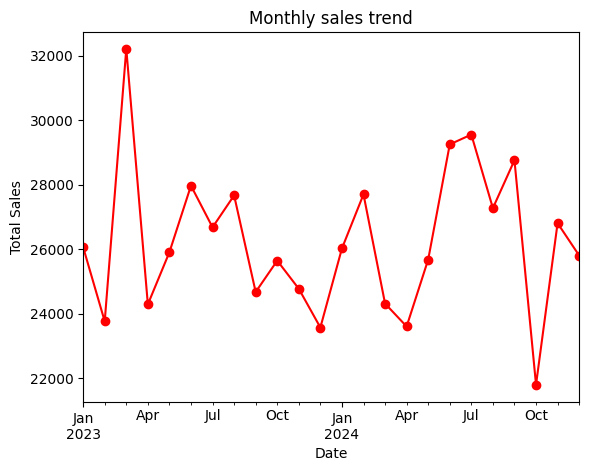

In [16]:
#now we will plot this 
#Plot sals trend
plt.Figure(figsize=(14,8))
monthly_sales.plot(kind='line',marker="o",color="r")
plt.title("Monthly sales trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")

Best- Selling Product

In [17]:
df.head(1)

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,2023-01-01,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560


In [18]:
#Aggregate sales by product
best_product=df.groupby(df['Product'])['Final Sales'].sum()
best_product

Product
Brazilian     102834
Colombian     144776
Costa Rica    141078
Ethiopian     134154
Guatemala     106806
Name: Final Sales, dtype: int64

Text(0, 0.5, 'total sales of product')

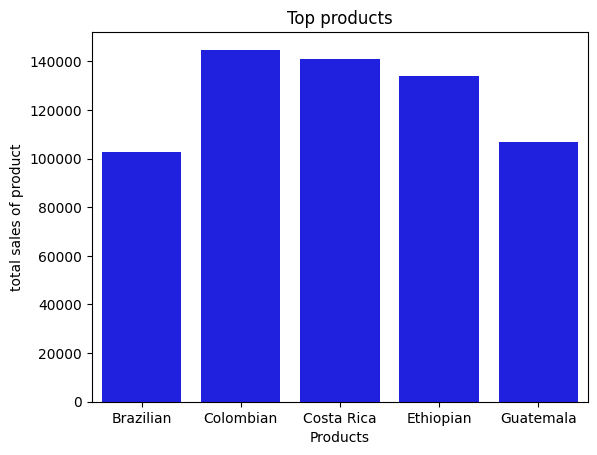

In [19]:
# plotting top products
plt.Figure(figsize=(12,4))
sns.barplot(x=best_product.index,y=best_product.values,color='b')
plt.title("Top products")
plt.xlabel("Products")
plt.ylabel("total sales of product")

In [20]:
#Aggregate Quantity sold by Product 
product_quantity=df.groupby(df['Product'])['Quantity'].sum()
product_quantity


Product
Brazilian     3792
Colombian     4072
Costa Rica    4452
Ethiopian     3298
Guatemala     3425
Name: Quantity, dtype: int64

C:\Users\Ashwani\AppData\Local\Temp\ipykernel_4260\1209794225.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_quantity.index,y=product_quantity.values,palette="Blues_r")


Text(0, 0.5, 'Product sales')

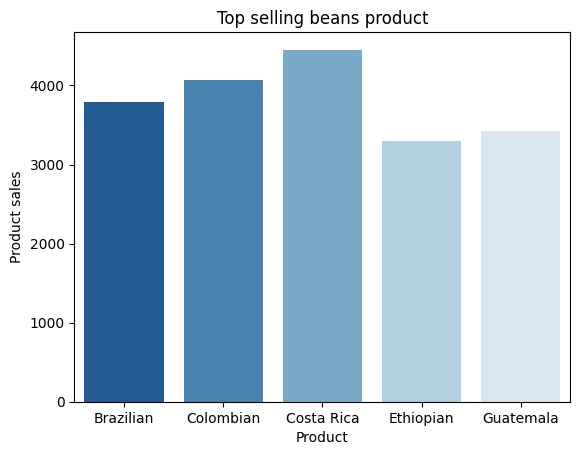

In [21]:
#now we will be plotting this 
plt.Figure(figsize=(12,4))
sns.barplot(x=product_quantity.index,y=product_quantity.values,palette="Blues_r")
plt.title('Top selling beans product')
plt.xlabel("Product")
plt.ylabel("Product sales")

Top Customers

In [25]:
#Top customers by total purchase
top_customers=df.groupby('Customer_ID')['Final Sales'].sum().sort_values(ascending=False)
top_10_customers = top_customers.head(10)

Text(0.5, 0, 'Total Sales')

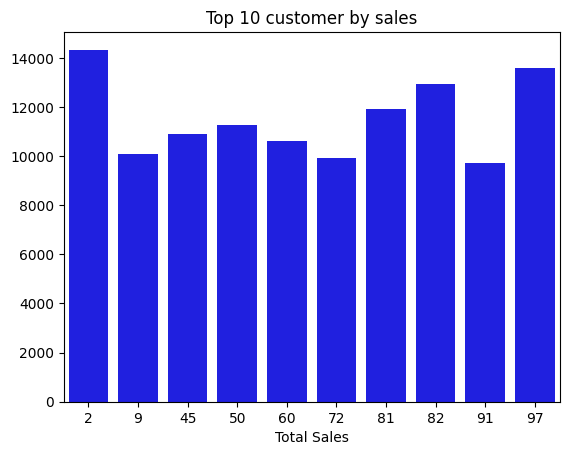

In [27]:
#Plot Top customers by 
plt.Figure(figsize=(14,6))
sns.barplot(x=top_10_customers.index,y=top_10_customers.values,color='blue')
plt.title("Top 10 customer by sales")
plt.xlabel("Total Sales")

Customer Retention How often they do?


In [28]:
df.head(1)

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,2023-01-01,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560


When you use df.groupby("Column_Name"), you're essentially performing the following:

Splitting: The DataFrame df is split into multiple groups based on the unique values found in the specified "Column_Name". For example, if "Column_Name" is "City" and your DataFrame has rows for "New York", "London", and "Paris", groupby("City") will create three separate groups, one for each city.

Creating GroupBy Object: The result of df.groupby("Column_Name") is not a new DataFrame directly. Instead, it's a special DataFrameGroupBy object. This object holds the information about how the original DataFrame has been grouped. It's an intermediate step that prepares the data for further operations.

What you can do with the DataFrameGroupBy object:

The power of groupby() comes from the operations you can apply to this DataFrameGroupBy object. These operations work on each of the created groups independently:

Aggregation: You can calculate summary statistics for each group using functions like:

.count(): Counts the number of non-missing values in each group.
.sum(): Calculates the sum of values in each group.
.mean(): Calculates the average of values in each group.
.median(): Calculates the median of values in each group.
.min(): Finds the minimum value in each group.
.max(): Finds the maximum value in each group.
.std(): Calculates the standard deviation in each group.
.agg(): Allows you to apply multiple aggregation functions at once or apply different functions to different columns.
Transformation: You can apply functions to each group that return a result with the same shape as the original group using .transform(). This is useful for tasks like standardizing data within each group.

Filtering: You can filter groups based on certain conditions using .filter().

Applying Custom Functions: You can apply your own custom functions to each group using .apply().

How groupby() relates to visualization:

groupby() is often a crucial step before visualizing data because it allows you to:

Summarize data: Reduce the complexity of your data by calculating key metrics for different categories. This summarized data is often easier and more meaningful to visualize.
Identify trends and patterns: By grouping data based on a specific column and then aggregating, you can reveal how different categories compare or how a variable changes across different groups.
Prepare data for specific plot types: Many plot types in libraries like Matplotlib and Seaborn expect data in a summarized or grouped format.

In [32]:
purchase_frequency=df.groupby("Customer_ID")['Customer_ID'].count().sort_values(ascending=False)
top_10_Purchase_Frequency=purchase_frequency.head(10)
top_10_Purchase_Frequency


Customer_ID
2     15
82    15
97    13
47    12
60    11
57    11
90    11
83    11
66    11
4     11
Name: Customer_ID, dtype: int64

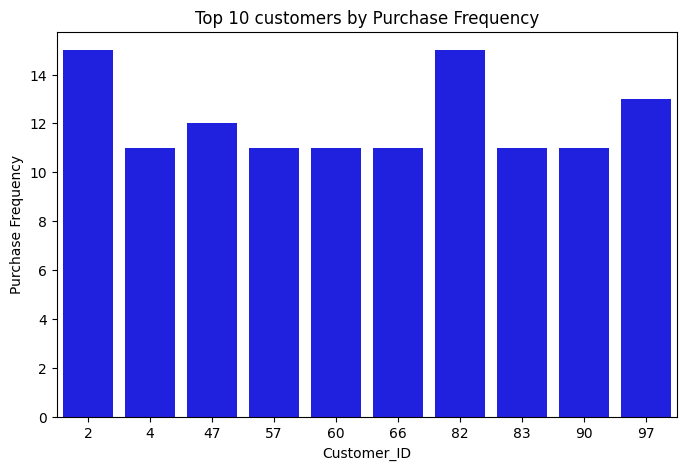

In [33]:
# Plot Top 10 Customers by Purchase Frequency
plt.figure(figsize=(8,5))
sns.barplot(x=top_10_Purchase_Frequency.index, y=top_10_Purchase_Frequency.values, color="Blue")
plt.title("Top 10 customers by Purchase Frequency")
plt.ylabel("Purchase Frequency")
plt.show()

Discount Analysis

In [36]:
#Compare sales with and without discounts
df.head(1)
discount_usage=df.groupby('Used_Discount')['Final Sales'].sum()
discount_usage

Used_Discount
False    345260
True     284388
Name: Final Sales, dtype: int64

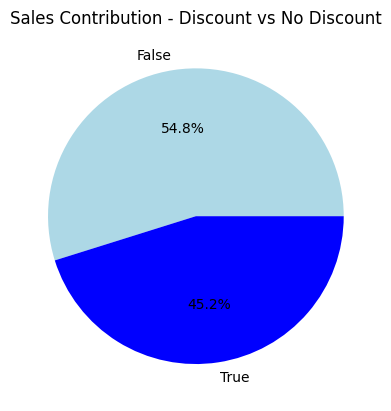

In [37]:
#Pie Chart
discount_usage.plot(kind="pie",autopct="%1.1f%%", colors=["lightblue", "blue"])
plt.title("Sales Contribution - Discount vs No Discount")
plt.ylabel("")
plt.show()

Top City by total sales.

In [38]:
#the total sales by Citys
df.head(1)

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,2023-01-01,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560


In [ ]:
sales_city=df.groupby('City')['Final Sales'].sum().sort_values(ascending=False)

sales_city

City
Abha        52831
Buraidah    56875
Dammam      59975
Hail        77257
Jeddah      72048
Khobar      59989
Mecca       66420
Medina      64813
Riyadh      68421
Tabuk       51019
Name: Final Sales, dtype: int64

C:\Users\Ashwani\AppData\Local\Temp\ipykernel_4260\687016341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_city.index,y=sales_city.values, palette="Blues_r")


<function matplotlib.pyplot.show(close=None, block=None)>

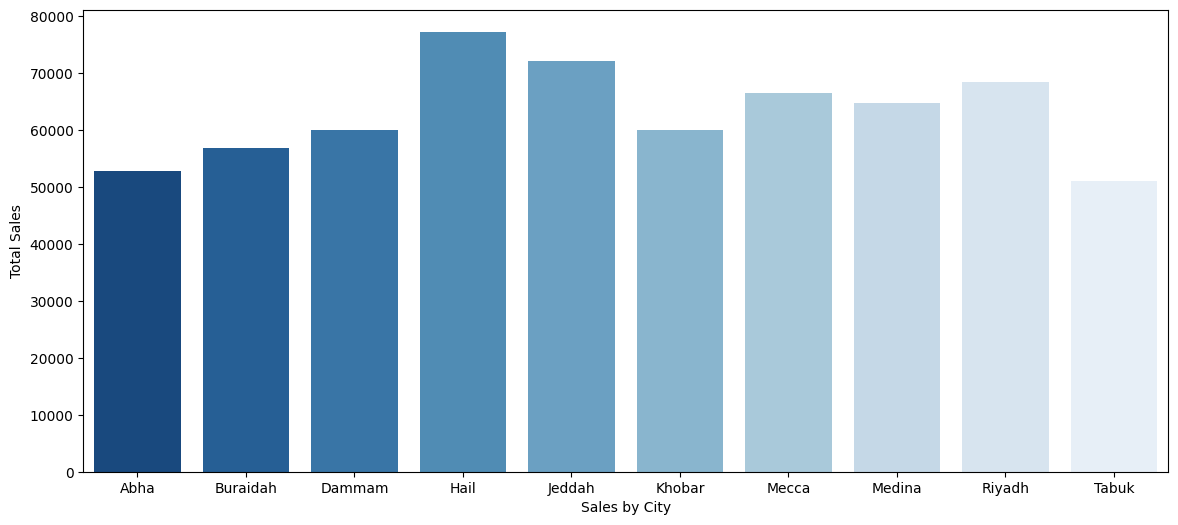

In [40]:
#ploting the total sales by city
plt.figure(figsize=(14,6))
sns.barplot(x=sales_city.index,y=sales_city.values, palette="Blues_r")
plt.xlabel("Sales by City")
plt.ylabel("Total Sales")
plt.show


Where Are Most Customers From?

In [41]:
#Where Are Most Customers From
Customer_Locations = df.groupby(['City'])['Customer_ID'].count().sort_values(ascending=False)
Customer_Locations

City
Hail        87
Riyadh      79
Mecca       77
Jeddah      77
Khobar      73
Dammam      72
Medina      71
Buraidah    69
Abha        66
Tabuk       59
Name: Customer_ID, dtype: int64

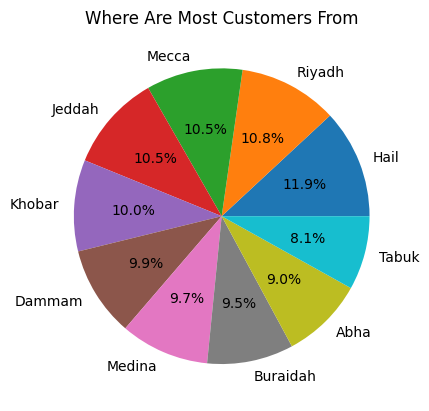

In [42]:
# Pie chart
Customer_Locations.plot(kind="pie", autopct="%1.1f%%")
plt.title("Where Are Most Customers From")
plt.ylabel("")
plt.show()

Sales Forecasting

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [44]:
# Aggregate sales per month
df_monthly = df.groupby(df["Date"].dt.to_period("M"))["Final Sales"].sum().reset_index()
df_monthly["Date"] = df_monthly["Date"].astype(str)  # Convert period to string
df_monthly["Date"] = pd.to_datetime(df_monthly["Date"])  # Convert back to datetime

# Create time index
df_monthly["Month_Index"] = np.arange(len(df_monthly))


In [45]:
# Split into train and test sets
train_size = int(len(df_monthly) * 0.8)
train, test = df_monthly.iloc[:train_size], df_monthly.iloc[train_size:]

# Features & target
X_train, y_train = train[["Month_Index"]], train["Final Sales"]
X_test, y_test = test[["Month_Index"]], test["Final Sales"]

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future sales
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 1773.47
RMSE: 2374.30


d:\Machine Learning\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ashwani\AppData\Local\Temp\ipykernel_4260\316687243.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df_monthly["Date"].max(), periods=7, freq="M")[1:]


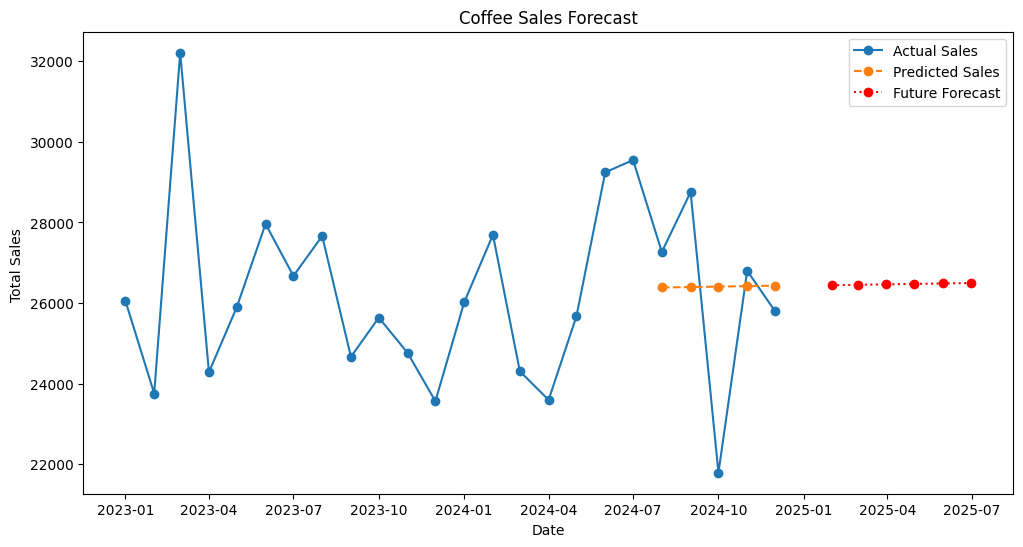

In [46]:
# Predict next 6 months
future_index = np.arange(len(df_monthly), len(df_monthly) + 6).reshape(-1, 1)
future_sales = model.predict(future_index)

# Create future dates
future_dates = pd.date_range(df_monthly["Date"].max(), periods=7, freq="M")[1:]

# Plot results
plt.figure(figsize=(12,6))
plt.plot(df_monthly["Date"], df_monthly["Final Sales"], label="Actual Sales", marker="o")
plt.plot(test["Date"], y_pred, label="Predicted Sales", linestyle="dashed", marker="o")
plt.plot(future_dates, future_sales, label="Future Forecast", linestyle="dotted", marker="o", color="red")
plt.xlabel("Date")
plt.ylabel("Total Sales ")
plt.title("Coffee Sales Forecast")
plt.legend()
plt.show()